<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Diabetes Prediction
</h1>
</div>

Predicting whether the human will be Diabetes or not by using different machine learning classification algorithams. 

### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [133]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve,f1_score,precision_score,recall_score
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [134]:
# Read data in form of a csv file
df = pd.read_csv("./data/pima-data.csv")

# First 5 rows of the dataset
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [135]:
# Dimension of the data
df.shape

(768, 10)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [137]:
# Summary of the dataset
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [138]:
# Missing values for every column
df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [139]:
# Get the list of numeric and categorical columns according to the input
input_datatype_selection = 'auto'
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['diabetes']
Categorical Columns :  []
Numerical Columns :  ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

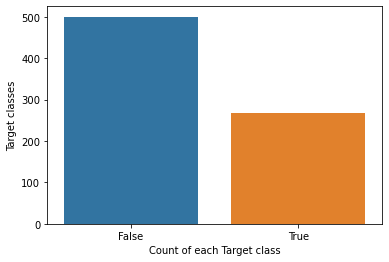

In [140]:
# Check distribution of target class
sns.countplot(df['diabetes'])
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Changing the diabetes column data from boolean to number

In [141]:
diabetes_map = {True: 1, False: 0}

In [142]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [143]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


### 3.3. Check the distribution of every feature

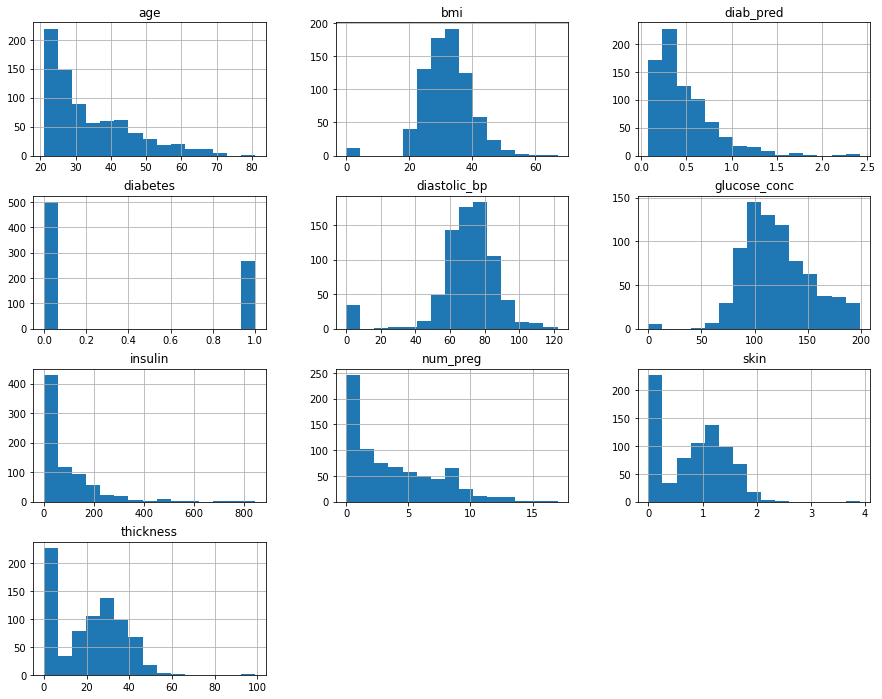

In [144]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [145]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

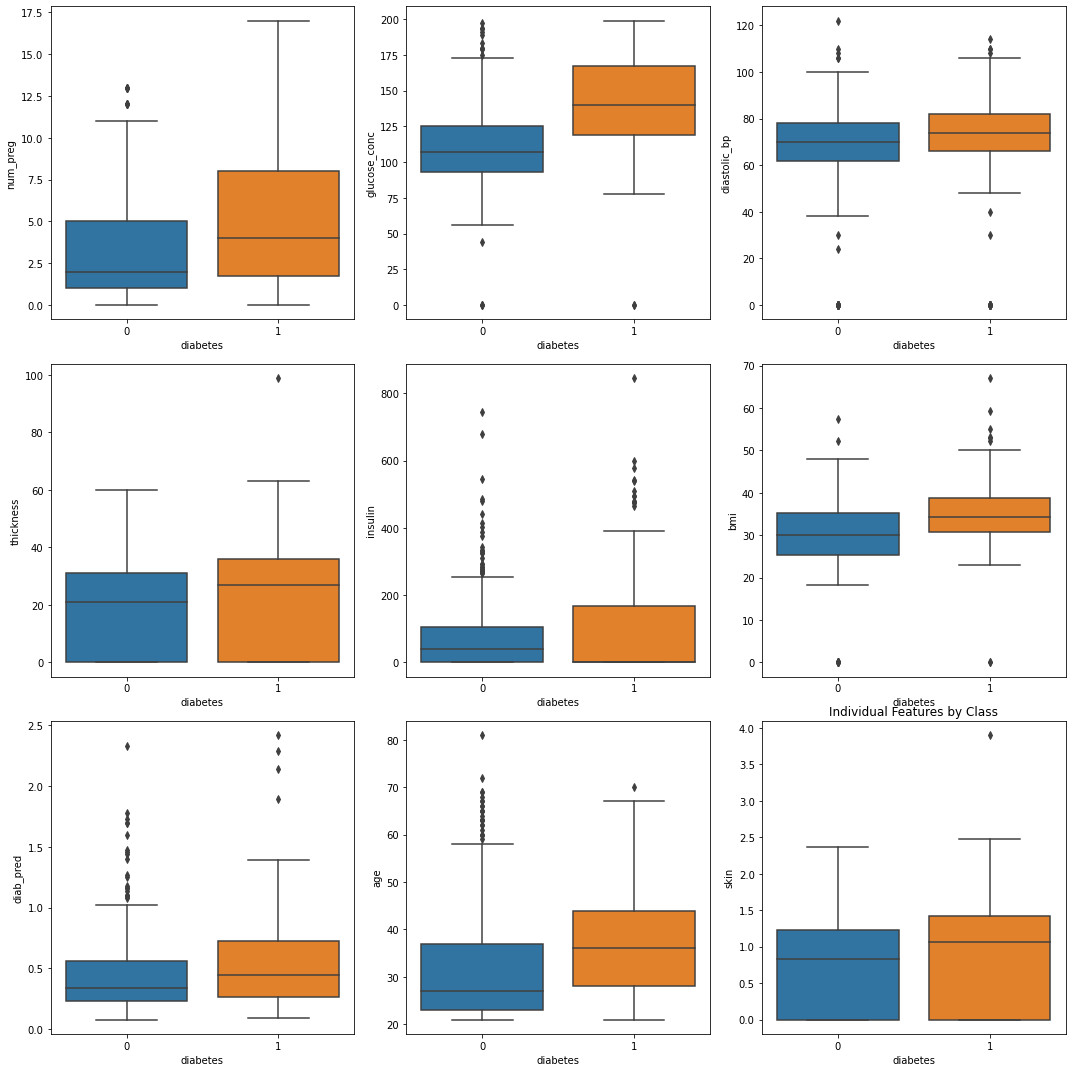

In [146]:
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(15,15))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['diabetes'], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

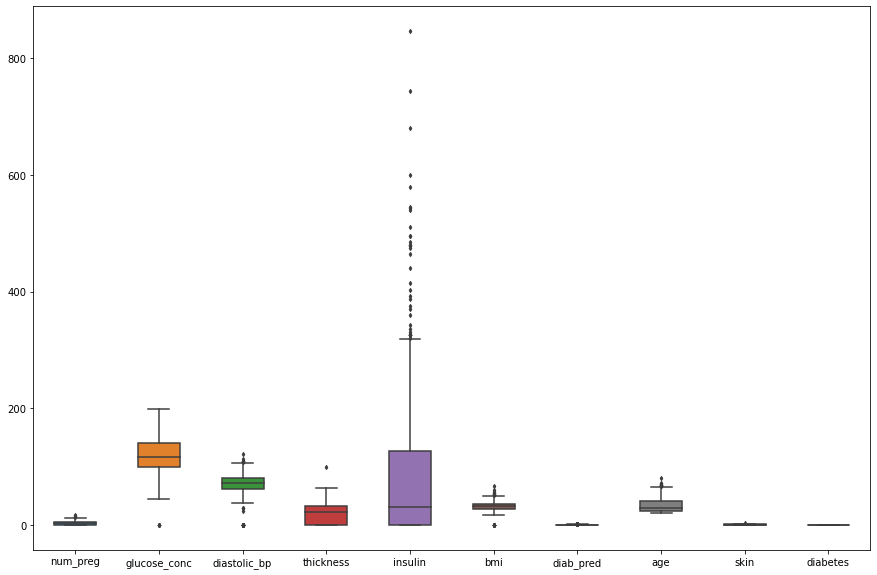

In [147]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


# Removing outliers

In [114]:
"""from numpy import percentile
q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

for i in df:
    df = df[df[i] > lower]
    df = df[df[i] < upper]
    """

'from numpy import percentile\nq25, q75 = percentile(df, 25), percentile(df, 75)\niqr = q75 - q25\n\ncut_off = iqr * 1.5\nlower, upper = q25 - cut_off, q75 + cut_off\n\nfor i in df:\n    df = df[df[i] > lower]\n    df = df[df[i] < upper]\n    '

In [115]:
q=df['diastolic_bp'].quantile(0.99)
df = df[df['diastolic_bp']<q]
q=df['glucose_conc'].quantile(0.97)
df = df[df['glucose_conc']<q]
q=df['insulin'].quantile(0.95)
df = df[df['insulin']<q]
q=df['bmi'].quantile(0.98)
df = df[df['bmi']<q]
q=df['age'].quantile(0.95)
df = df[df['age']<q]

In [35]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0


In [116]:
df.shape

(648, 10)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

# Check how many other missing(zero) values

In [148]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [149]:
# Select how you wish to treat missing values according to the input provided
input_treat_missing_value ='impute'

if input_treat_missing_value == 'drop':
    
    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute': 
    
    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode())
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

In [150]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


### 4.3. Split X and y

Split the X and y dataset

In [151]:
# Split the y variable series and x variables dataset
X = df.drop(['diabetes'],axis=1)
y = df['diabetes']

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [152]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [153]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0.907270
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.530902
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,-1.288212
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.154533
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0.907270


### 4.5 Train - Test Split

Split the dataset in training and test set

In [154]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel=LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = metrics.accuracy_score(y_test, pred)

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('logmodel_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('logmodel_Recall : ',Recall)

# F1 Score
logmodel_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('logmodel_F1_Score : ',logmodel_F1_Score)

# Area Under Curve
logmodel_auc = roc_auc_score(y_test,pred)
print('logmodel_roc_auc_score : ',logmodel_auc)
print('logmodel_accuracy',logmodel_accuracy)

logmodel_Precision :  0.8980891719745223
logmodel_Recall :  0.8011363636363636
logmodel_F1_Score :  0.8468468468468467
logmodel_roc_auc_score :  0.7125580995007746
logmodel_accuracy 0.7792207792207793


In [156]:
#Fit the DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy =metrics.accuracy_score(y_test, pred)

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('dt_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('dt_Recall : ',Recall)

# F1 Score
dt_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('dt_F1_Score : ',dt_F1_Score)

# Area Under Curve
dt_auc = roc_auc_score(y_test,pred)
print('dt_roc_auc_score : ',dt_auc)
print('dt_accuracy',dt_accuracy)

dt_Precision :  0.7770700636942676
dt_Recall :  0.7973856209150327
dt_F1_Score :  0.7870967741935485
dt_roc_auc_score :  0.6790755723876744
dt_accuracy 0.7142857142857143


In [157]:
#Fit the RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion = 'entropy',random_state=1)
rf=rf.fit(X_train,y_train)
pred=rf.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = metrics.accuracy_score(y_test, pred) 

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('rf_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('rf_Recall : ',Recall)

# F1 Score
rf_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('rf_F1_Score : ',rf_F1_Score)

# Area Under Curve
rf_auc = roc_auc_score(y_test,pred)
print('rf_roc_auc_score : ',rf_auc)
print('rf_accuracy',rf_accuracy)

rf_Precision :  0.89171974522293
rf_Recall :  0.8235294117647058
rf_F1_Score :  0.8562691131498471
rf_roc_auc_score :  0.7431571699087623
rf_accuracy 0.7965367965367965


In [158]:
#Fit the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier( n_neighbors=5,p=2) #p=2 means euclidean distance
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = metrics.accuracy_score(y_test, pred) 


confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('knn_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('knn_Recall : ',Recall)

# F1 Score
knn_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('knn_F1_Score : ',logmodel_F1_Score)

# Area Under Curve
knn_auc = roc_auc_score(y_test,pred)
print('knn_roc_auc_score : ',knn_auc)
print('knn_accuracy',knn_accuracy)

knn_Precision :  0.8726114649681529
knn_Recall :  0.8154761904761905
knn_F1_Score :  0.8468468468468467
knn_roc_auc_score :  0.726846273024617
knn_accuracy 0.7792207792207793


In [159]:
#Fit the SVC
from sklearn.svm import SVC
SVC=SVC(random_state=1, kernel='rbf')
SVC.fit(X_train,y_train)
pred=SVC.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = metrics.accuracy_score(y_test, pred)

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('svc_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('svc_Recall : ',Recall)

# F1 Score
svc_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('svc_F1_Score : ',svc_F1_Score)

# Area Under Curve
svc_auc = roc_auc_score(y_test,pred)
print('svc_roc_auc_score : ',svc_auc)
print('svc_accuracy',svc_accuracy)

svc_Precision :  0.8853503184713376
svc_Recall :  0.7853107344632768
svc_F1_Score :  0.8323353293413174
svc_roc_auc_score :  0.685918402478912
svc_accuracy 0.7575757575757576


In [160]:
#Fit the naive_bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
pred=nb.predict(X_test)

# Find Accuracy using accuracy_score method
nb_accuracy =metrics.accuracy_score(y_test, pred)

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('nb_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('nb_Recall : ',Recall)

# F1 Score
nb_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('nb_F1_Score : ',nb_F1_Score)

# Area Under Curve
nb_auc = roc_auc_score(y_test,pred)
print('nb_roc_auc_score : ',nb_auc)
print('nb_accuracy',nb_accuracy)

nb_Precision :  0.8789808917197452
nb_Recall :  0.7976878612716763
nb_F1_Score :  0.8363636363636364
nb_roc_auc_score :  0.7030039593733861
nb_accuracy 0.7662337662337663


In [161]:
#Fit the xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(criterion='gini',max_depth=5, n_estimators=50)
xgb.fit(X_train, y_train)
pred=xgb.predict(X_test)

# Find Accuracy using accuracy_score method
xgb_accuracy = metrics.accuracy_score(y_test, pred) 

confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('xgb_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('xgb_Recall : ',Recall)

# F1 Score
xgb_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('xgb_F1_Score : ',xgb_F1_Score)

# Area Under Curve
xgb_auc = roc_auc_score(y_test,pred)
print('xgb_roc_auc_score : ',xgb_auc)


[15:16:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


xgb_Precision :  0.802547770700637
xgb_Recall :  0.8181818181818182
xgb_F1_Score :  0.8102893890675242
xgb_roc_auc_score :  0.7120846961611293


In [162]:
#Fit the sgd
from sklearn.linear_model import SGDClassifier
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)

# Find Accuracy using accuracy_score method
sgd_accuracy = metrics.accuracy_score(y_test, pred) 


confusionmatrix=confusion_matrix(y_test,pred) 

true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
false_negative=confusionmatrix[1][0]
true_negative=confusionmatrix[1][1]

# Precison
Precision = true_positive/(true_positive+false_positive)
print('sgd_Precision : ',Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print('sgd_Recall : ',Recall)

# F1 Score
sgd_F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('sgd_F1_Score : ',sgd_F1_Score)

# Area Under Curve
sgd_auc = roc_auc_score(y_test,pred)
print('sgd_roc_auc_score : ',sgd_auc)
print('sgd_accuracy',sgd_accuracy)

sgd_Precision :  0.7579617834394905
sgd_Recall :  0.7531645569620253
sgd_F1_Score :  0.7555555555555556
sgd_roc_auc_score :  0.6154673782062318
sgd_accuracy 0.6666666666666666


In [163]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest','SGDClassifier','Naive Bayes','XGBClassifier'],
    'Accuracy': [logmodel_accuracy, svc_accuracy, knn_accuracy,dt_accuracy, rf_accuracy, nb_accuracy, sgd_accuracy, xgb_accuracy],
    'roc_auc_score': [logmodel_auc, svc_auc, knn_auc, dt_auc, rf_auc, nb_auc, sgd_auc, xgb_auc],
    'F1_score':[logmodel_F1_Score, svc_F1_Score, knn_F1_Score, dt_F1_Score, rf_F1_Score, nb_F1_Score, sgd_F1_Score, xgb_F1_Score]})

Model_Comparison_df = Model_Comparison.sort_values(by='roc_auc_score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy,roc_auc_score,F1_score
0,Random Forest,0.796537,0.743157,0.856269
1,K-Nearest Neighbor,0.779221,0.726846,0.843077
2,Logistic Regression,0.779221,0.712558,0.846847
3,XGBClassifier,0.744589,0.712085,0.810289
4,SGDClassifier,0.766234,0.703004,0.836364
5,Support Vector Machine,0.757576,0.685918,0.832335
6,Decision Tree,0.714286,0.679076,0.787097
7,Naive Bayes,0.666667,0.615467,0.755556


In [164]:
"""from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()"""

"from sklearn.cluster import KMeans\nwcss=[]\nfor i in range(1,11):\n    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)\n    kmeans.fit(X)\n    wcss.append(kmeans.inertia_)\nplt.plot(range(1,11),wcss)\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('WCSS')\nplt.show()"

In [165]:
"""from kneed import KneeLocator
s=KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
s.knee"""

"from kneed import KneeLocator\ns=KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')\ns.knee"

In [166]:
"""import pickle
kmeans = KMeans(n_clusters =s.knee, init = 'k-means++', random_state = 42)
with open( 'kmeans.sav', 'wb') as f:
    pickle.dump(kmeans,f)
y_kmeans = kmeans.fit_predict(X)"""

"import pickle\nkmeans = KMeans(n_clusters =s.knee, init = 'k-means++', random_state = 42)\nwith open( 'kmeans.sav', 'wb') as f:\n    pickle.dump(kmeans,f)\ny_kmeans = kmeans.fit_predict(X)"

In [167]:
"""x=X
x['Cluster']=y_kmeans
x['Labels']=y
list_of_clusters=x['Cluster'].unique()
x.head()"""

"x=X\nx['Cluster']=y_kmeans\nx['Labels']=y\nlist_of_clusters=x['Cluster'].unique()\nx.head()"

In [168]:
"""model_name=[]
for i in list_of_clusters:
    cluster_data=x[x['Cluster']==i] 
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=.25, random_state=36)
    
# creating a new model with RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier(criterion = 'entropy',random_state=1)
    rt=rf.fit(x_train,y_train)
    # Predictions using the RandomForestClassifier Model
    prediction_rf=rf.predict(x_test)
    
    if len(y_test.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        rf_score = accuracy_score(y_test,prediction_svm)
        print('rf_score',rf_score)
    else:
        rf_score = roc_auc_score(y_test, prediction_rf) # AUC for Random Forest
        print('rf_score',rf_score)
               

# creating a new model with XGBClassifier
    xgb = XGBClassifier(criterion='gini',max_depth=5, n_estimators=50)
    xgb.fit(x_train, y_train)
    # Predictions using the XGBClassifier Model
    prediction_xgboost = xgb.predict(x_test)  
    if len(y_test.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        xgboost_score = accuracy_score(y_test, prediction_xgboost)
        print('xgboost_score',xgboost_score)
    else:
        xgboost_score = roc_auc_score(y_test, prediction_xgboost) # AUC for XGBoost
        print('xgboost_score',xgboost_score)
                
    
   #comparing the two models
    if(rf_score <  xgboost_score):
        print('XGBoost'+str(i))
        model_name.append('XGBoost'+str(i) +'.sav')
        with open( 'XGBoost'+str(i)+'.sav', 'wb') as f:
            pickle.dump(xgb,f)
       
        
    else:
        print('RF'+str(i))
        model_name.append('rf'+str(i) +'.sav')
        with open( 'RF'+str(i)+'.sav', 'wb') as f:
            pickle.dump(rf,f)
l=model_name"""

"model_name=[]\nfor i in list_of_clusters:\n    cluster_data=x[x['Cluster']==i] \n    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)\n    cluster_label= cluster_data['Labels']\n    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=.25, random_state=36)\n    \n# creating a new model with RandomForestClassifier\n    from sklearn.ensemble import RandomForestClassifier\n    rf=RandomForestClassifier(criterion = 'entropy',random_state=1)\n    rt=rf.fit(x_train,y_train)\n    # Predictions using the RandomForestClassifier Model\n    prediction_rf=rf.predict(x_test)\n    \n    if len(y_test.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case\n        rf_score = accuracy_score(y_test,prediction_svm)\n        print('rf_score',rf_score)\n    else:\n        rf_score = roc_auc_score(y_test, prediction_rf) # AUC for Random Forest\n        print('rf_score',rf_score)\n        

In [169]:
"""class prediction:
    #def __init__(self):
    
    def model_prediction(data):
        clus=open('kmeans.sav','rb')
        kmeans=pickle.load(clus)


        clusters=kmeans.fit_predict(data)
        data['clusters']=clusters
        clusters=data['clusters'].unique()
        result=[]


        def find_correct_model_file(p):
            for u in l:
                for i in u:
                    for k in i:
                        if str(p)==str(k):
                            return u

        for i in clusters:
            cluster_data= data[data['clusters']==i]
            cluster_data = cluster_data.drop(['clusters'],axis=1)
            model_name=find_correct_model_file(i)
            model=open(model_name,'rb')
            model=pickle.load(model)
            for val in (model.predict(cluster_data)):
                result.append(val)
        result = pd.DataFrame(result,columns=['Predictions'])
        path="Predictions.csv"
        result.to_csv("Predictions.csv",header=True)
        print(result)"""

'class prediction:\n    #def __init__(self):\n    \n    def model_prediction(data):\n        clus=open(\'kmeans.sav\',\'rb\')\n        kmeans=pickle.load(clus)\n\n\n        clusters=kmeans.fit_predict(data)\n        data[\'clusters\']=clusters\n        clusters=data[\'clusters\'].unique()\n        result=[]\n\n\n        def find_correct_model_file(p):\n            for u in l:\n                for i in u:\n                    for k in i:\n                        if str(p)==str(k):\n                            return u\n\n        for i in clusters:\n            cluster_data= data[data[\'clusters\']==i]\n            cluster_data = cluster_data.drop([\'clusters\'],axis=1)\n            model_name=find_correct_model_file(i)\n            model=open(model_name,\'rb\')\n            model=pickle.load(model)\n            for val in (model.predict(cluster_data)):\n                result.append(val)\n        result = pd.DataFrame(result,columns=[\'Predictions\'])\n        path="Predictions.csv"\n  

In [170]:
"""a=prediction.model_prediction(X_test)"""

'a=prediction.model_prediction(X_test)'

In [171]:
"""a=pd.read_csv('Predictions.csv')
del a['Unnamed: 0']
a.replace(1,'yes',inplace=True)
a.replace(0,'no',inplace=True)"""

"a=pd.read_csv('Predictions.csv')\ndel a['Unnamed: 0']\na.replace(1,'yes',inplace=True)\na.replace(0,'no',inplace=True)"

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [172]:
# Define the parameters gird for random forest
param_grid= {'max_depth'   : [10,20,40],
             'criterion' : ['entropy','gini'],
             'n_estimators' : [100,200,300],
             'min_samples_leaf' : [1,2,5]        
                           }  

In [173]:
 # Run grid search 
grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   41.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,

In [174]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1]
Y probability predicted :  [0.7777407037407038, 0.12431410256410258, 0.0987470584970585, 0.49903255078255077, 0.1041220139509613]


In [175]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [176]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 


 Accuracy Score : 
  0.7705627705627706

 AUC Score : 
 0.8358581511447754

 Confusion Matrix : 
  [[140  17]
 [ 36  38]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.51      0.59        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231


 ROC curve : 



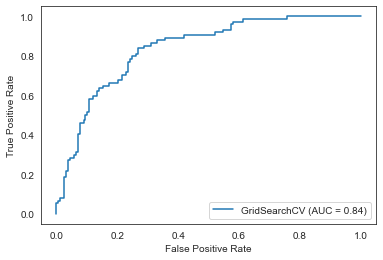

In [177]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

In [178]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [179]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)